## Finding Pattersn of Text with Regular Expressions

Regular expressions, called regexes for short, are descriptions for a pattern of text.

## Creating RegEx Objects

In [3]:
import re

Passing a string value representing your regular expression to `re.compile()` returns a Regex pattern object (or simply, a Regex object).

In [4]:
phone_num_regex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d')

In [5]:
phone_num_regex

re.compile(r'\d\d\d-\d\d\d-\d\d\d\d', re.UNICODE)

## Matching RegEx Objects

A Regex object’s `search()` method searches the string it is passed for any matches to the regex. The `search()` method will return `None` if the regex pattern is not found in the string. If the pattern is found, the `search()` method returns a `Match` object, which have a `group()` method that will return the actual matched text from the searched string.

In [6]:
phone_num_regex = re.compile(r'\d{3}-\d{3}-\d{4}')
mo = phone_num_regex.search('My number is 415-555-4242.')
print('Phone number found: ' + mo.group())

Phone number found: 415-555-4242


## Review of Regular Expression Matching


While there are several steps to using regular expressions in Python, each step is fairly simple.

1. Import the regex module with `import re`.
2. Create a Regex object with the `re.compile()` function. (Remember to use a raw string.)
3. Pass the string you want to search into the Regex object’s `search()` method. This returns a `Match` object.
4. Call the `Match` object’s `group()` method to return a string of the actual matched text.

## More Pattern Matching with Regular Expressions

## Grouping with Parentheses

Adding parentheses will create groups in the regex: (\d\d\d)-(\d\d\d-\d\d\d\d). Then you can use the group() match object method to grab the matching text from just one group.

The first set of parentheses in a regex string will be group 1. The second set will be group 2. By passing the integer 1 or 2 to the `group()` match object method, you can grab different parts of the matched text. Passing 0 or nothing to the `group()` method will return the entire matched text.

In [7]:
phone_num_regex = re.compile(r'(\d\d\d)-(\d\d\d-\d\d\d\d)')
mo = phone_num_regex.search('My number is 415-555-4242.')

In [8]:
mo.group(1)

'415'

In [9]:
mo.group(2)

'555-4242'

In [10]:
mo.group(0)

'415-555-4242'

In [11]:
mo.group()

'415-555-4242'

If you would like to retrieve all the groups at once, use the `groups()` method—note the plural form for the name.

In [12]:
mo.groups()

('415', '555-4242')

In [13]:
area_code, main_number = mo.groups()

In [14]:
print(area_code)

415


In [15]:
print(main_number)

555-4242


Since `mo.groups()` returns a tuple of multiple values, you can use the multiple-assignment trick to assign each value to a separate variable, as in the previous `area_code, main_number = mo.groups()` line.

Parentheses have a special meaning in regular expressions, but what do you do if you need to match a parenthesis in your text? For instance, maybe the phone numbers you are trying to match have the area code set in parentheses. In this case, you need to escape the ( and ) characters with a backslash.

In [16]:
phone_num_regex = re.compile(r'(\(\d\d\d\)) (\d\d\d-\d\d\d\d)')
mo = phone_num_regex.search('My phone number is (415) 555-4242.')
mo.group(1)

'(415)'

In [17]:
mo.group(2)

'555-4242'

The `\(` and `\)` escape characters in the raw string passed to `re.compile()` will match actual parenthesis characters. In regular expressions, the following characters have special meanings:

`.  ^  $  *  +  ?  {  }  [  ]  \  |  (  )`

If you want to detect these characters as part of your text pattern, you need to escape them with a backslash:

`\.  \^  \$  \*  \+  \?  \{  \}  \[  \]  \\  \|  \(  \)`

## Matching Multiple Groups with the Pipe

The `|` character is called a pipe. You can use it anywhere you want to match one of many expressions. For example, the regular expression `r'Batman|Tina Fey'` will match either `'Batman'` or `'Tina Fey'`.

When both `Batman` and `Tina Fey` occur in the searched string, the first occurrence of matching text will be returned as the Match object. 

In [18]:
heroRegex = re.compile (r'Batman|Tina Fey')
mo1 = heroRegex.search('Batman and Tina Fey')
mo1.group()

'Batman'

In [19]:
mo2 = heroRegex.search('Tina Fey and Batman')

In [20]:
 mo2.group()

'Tina Fey'

You can also use the pipe to match one of several patterns as part of your regex. For example, say you wanted to match any of the strings 'Batman', 'Batmobile', 'Batcopter', and 'Batbat'. Since all these strings start with Bat, it would be nice if you could specify that prefix only once. This can be done with parentheses.

In [21]:
batRegex = re.compile(r'Bat(man|mobile|copter|bat)')
mo = batRegex.search('Batmobile lost a wheel')
mo.group()

'Batmobile'

In [22]:
mo.group(1)

'mobile'

## Optional Matching with the Question Mark

Sometimes there is a pattern that you want to match only optionally. That is, the regex should find a match regardless of whether that bit of text is there. The ? character flags the group that precedes it as an optional part of the pattern.

In [23]:
batRegex = re.compile(r'Bat(wo)?man')
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [24]:
mo2 = batRegex.search('The Adventures of Batwoman')

In [25]:
mo2.group()

'Batwoman'

The (wo)? part of the regular expression means that the pattern wo is an optional group. The regex will match text that has zero instances or one instance of wo in it. This is why the regex matches both 'Batwoman' and 'Batman'.

Using the earlier phone number example, you can make the regex look for phone numbers that do or do not have an area code. Enter the following into the interactive shell:

In [26]:
phoneRegex = re.compile(r'(\d{3}-)?\d{3}-\d{4}')
mo1 = phoneRegex.search('My number is 415-555-4242')
mo1.group()

'415-555-4242'

In [27]:
mo2 = phoneRegex.search('My number is 555-4242')
mo2.group()

'555-4242'

## Matching Zero or More with the Star

The * (called the star or asterisk) means “match zero or more”—the group that precedes the star can occur any number of times in the text. It can be completely absent or repeated over and over again. Let’s look at the Batman example again.

In [36]:
batRegex = re.compile(r'Bat(wo)*man')

In [37]:
mo1 = batRegex.search('The Adventures of Batman')
mo1.group()

'Batman'

In [38]:
mo2 = batRegex.search('The Adventures of Batwoman')
mo2.group()

'Batwoman'

In [39]:
mo3 = batRegex.search('The Adventures of Batwowowowoman')
mo3.group()

'Batwowowowoman'

## Matching One or More with the plus

While `*` means “match zero or more,” the `+` (or plus) means “match one or more.” Unlike the star, which does not require its group to appear in the matched string, the group preceding a plus must appear at least once. It is not optional.

In [40]:
batRegex = re.compile(r'Bat(wo)+man')

In [41]:
mo1 = batRegex.search('The Adventures of Batwoman')
mo1.group()

'Batwoman'

In [42]:
mo2 = batRegex.search('The Adventures of Batwowowowoman')
mo2.group()

'Batwowowowoman'

In [43]:
mo3 = batRegex.search('The Adventures of Batman')
mo3 == None

True

## Matching Specific Repetitions with Braces

If you have a group that you want to repeat a specific number of times, follow the group in your regex with a number in braces. For example, the regex (Ha){3} will match the string 'HaHaHa', but it will not match 'HaHa', since the latter has only two repeats of the (Ha) group.

Instead of one number, you can specify a range by writing a minimum, a comma, and a maximum in between the braces. For example, the regex (Ha){3,5} will match 'HaHaHa', 'HaHaHaHa', and 'HaHaHaHaHa'.

You can also leave out the first or second number in the braces to leave the minimum or maximum unbounded. For example, (Ha){3,} will match three or more instances of the (Ha) group, while (Ha){,5} will match zero to five instances. Braces can help make your regular expressions shorter.

In [44]:
haRegex = re.compile(r'(Ha){3}')

In [45]:
mo1 = haRegex.search('HaHaHa')
mo1.group()

'HaHaHa'

In [46]:
mo2 = haRegex.search('Ha')
mo2 == None

True

## Greedy and Non-greedy Matching

Python’s regular expressions are greedy by default, which means that in ambiguous situations they will match the longest string possible. The non-greedy (also called lazy) version of the braces, which matches the shortest string possible, has the closing brace followed by a question mark.

In [47]:
greedyHaRegex = re.compile(r'(Ha){3,5}')

In [48]:
mo1 = greedyHaRegex.search('HaHaHaHaHa')
mo1.group()

'HaHaHaHaHa'

In [49]:
nongreedyHaRegex = re.compile(r'(Ha){3,5}?')

In [50]:
mo2 = nongreedyHaRegex.search('HaHaHaHaHa')
mo2.group()

'HaHaHa'

Note that the question mark can have two meanings in regular expressions: declaring a non-greedy match or flagging an optional group. These meanings are entirely unrelated.

The `findall()` Method

In addition to the `search()` method, Regex objects also have a `findall()` method. While `search()` will return a Match object of the first matched text in the searched string, the `findall()` method will return the strings of every match in the searched string. To see how `search()` returns a Match object only on the first instance of matching text, enter the following into the interactive shell:

In [54]:
phoneNumRegex = re.compile(r'\d\d\d-\d\d\d-\d\d\d\d') # has no groups
mo = phoneNumRegex.search('Cell: 415-555-9999 Work: 212-555-0000')
mo.group()

'415-555-9999'

On the other hand, `findall()` will not return a Match object but a list of strings-*as long as there are no groups in the regular expression*. Each string in the list is a piece of the searched text that matched the regular expression. Enter the following into the interactive shell:

In [55]:
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

['415-555-9999', '212-555-0000']

If there are groups in the regular expression, then `findall()` will return a list of tuples. Each tuple represents a found match, and its items are the matched strings for each group in the regex. To see `findall()` in action, enter the following into the interactive shell (notice that the regular expression being compiled now has groups in parentheses):

In [56]:
phoneNumRegex = re.compile(r'(\d\d\d)-(\d\d\d)-(\d\d\d\d)') # has groups
phoneNumRegex.findall('Cell: 415-555-9999 Work: 212-555-0000')

[('415', '555', '9999'), ('212', '555', '0000')]

## Character Classes

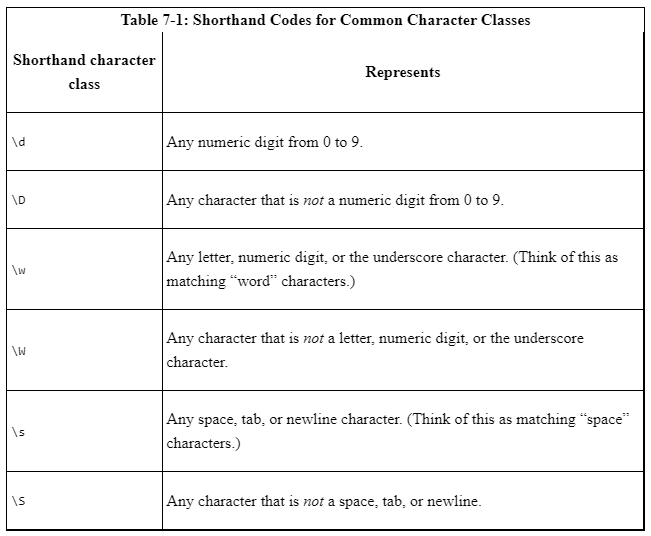

Character classes are nice for shortening regular expressions. The character class [0-5] will match only the numbers 0 to 5; this is much shorter than typing (0|1|2|3|4|5). Note that while \d matches digits and \w matches digits, letters, and the underscore, there is no shorthand character class that matches only letters. (Though you can use the [a-zA-Z] character class, as explained next.)

In [57]:
xmasRegex = re.compile(r'\d+\s\w+')
xmasRegex.findall('12 drummers, 11 pipers, 10 lords, 9 ladies, 8 maids, 7 swans, 6 geese, 5 rings, 4 birds, 3 hens, 2 doves, 1 partridge')

['12 drummers',
 '11 pipers',
 '10 lords',
 '9 ladies',
 '8 maids',
 '7 swans',
 '6 geese',
 '5 rings',
 '4 birds',
 '3 hens',
 '2 doves',
 '1 partridge']

The regular expression `\d+\s\w+` will match text that has one or more numeric digits (`\d+`), followed by a whitespace character (`\s`), followed by one or more letter/digit/underscore characters (`\w+`). The `findall()` method returns all matching strings of the regex pattern in a list.